In [1]:
import os
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

In [4]:
BASE_PATH='/grand/projects/BirdAudio/Soundscapes/First_Filtered_Spectrograms/'

PATH='set1/00023757/20210702_STUDY/20210702T170007-0500_Rec_211.png'
#PATH='set1/00023764/20210526_STUDY/20210526T140000+0000_REC_64.png'
#PATH='set1/00023764/20210526_STUDY/20210526T000000+0000_REC_57.png'
#PATH='set1/00023764/20210524_STUDY/20210524T230000+0000_REC_355.png'
#PATH='set1/00023764/20210526_STUDY/20210526T000000+0000_REC_388.png'
#PATH='set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2185.png'
#PATH='set1/00023757/20210704_STUDY/20210704T131736-0500_Rec_1057.png'
#PATH='set2/00004862/20210714_STUDY/20210714T170000-0500_Rec_188.png'
#PATH='set1/00023734/20210628_STUDY/20210628T170000-0500_Rec_435.png'
#PATH='set1/00023734/20210628_STUDY/20210628T170000-0500_Rec_998.png'
#PATH='set1/00023734/20210702_STUDY/20210702T131738-0500_Rec_856.png'
#PATH='set1/00023734/20210702_STUDY/20210702T131738-0500_Rec_126.png'
#PATH='set3/00023757/20210815_STUDY/20210815T131737-0500_Rec_918.png'
#PATH='set3/00004879/20210816_STUDY/20210816T170000-0500_Rec_1192.png'
#PATH='set2/00004879/20210612_STUDY/20210612T000000-0500_REC_17.png'
#PATH='set1/00023734/20210629_STUDY/20210629T030845-0500_Rec_136.png'
#PATH='set1/00023734/20210629_STUDY/20210629T030845-0500_Rec_488.png'
#PATH='set2/00023734/20210717_STUDY/20210717T131738-0500_Rec_1146.png'
#PATH='set1/00023734/20210703_STUDY/20210703T131739-0500_Rec_901.png'
#PATH='set1/00023734/20210703_STUDY/20210703T030854-0500_Rec_822.png'
#PATH='set2/00023771/20210722_STUDY/20210722T030852-0500_Rec_689.png'

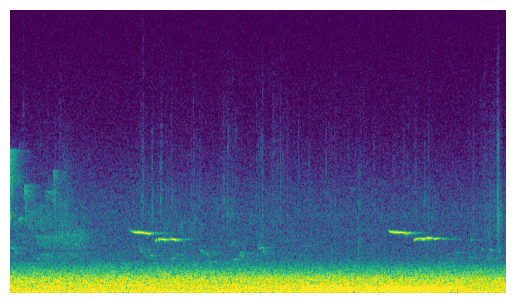

In [5]:
img = Image.open(os.path.join(BASE_PATH, PATH))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
dpath='/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/'

df = pd.read_csv (os.path.join(dpath, 'Data.csv'))

df

FileNotFoundError: [Errno 2] No such file or directory: '/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/Data.csv'

In [ ]:
sample=df[df['paths']==PATH]
list(sample['y'])[0]

In [ ]:
data=[]
v1 = np.array([list(sample['x'])[0], list(sample['y'])[0]])
for row in df.iterrows():
    v2 = np.array([row[1]['x'], row[1]['y']])
    dist = np.linalg.norm(v1 - v2)
    auxiliary={}
    auxiliary['detection']=row[1]['detection']
    auxiliary['confidence']=row[1]['confidence']
    auxiliary['year']=row[1]['year']
    auxiliary['month']=row[1]['month']
    auxiliary['day']=row[1]['day']
    auxiliary['hour']=row[1]['hour']
    auxiliary['minute']=row[1]['minute']
    auxiliary['second']=row[1]['second']
    auxiliary['week']=row[1]['week']
    auxiliary['weekday']=row[1]['weekday']
    auxiliary['device']=row[1]['device']
    auxiliary['set']=row[1]['set']
    auxiliary['x']=row[1]['x']
    auxiliary['y']=row[1]['y']
    auxiliary['labels']=row[1]['labels']
    auxiliary['paths']=row[1]['paths']
    auxiliary['detection']=row[1]['detection']
    auxiliary['dist']=dist
    data.append(auxiliary)
    
data = pd.DataFrame(data=data)
data

In [ ]:
data=data.sort_values(by=['dist'])

In [ ]:
data

In [ ]:
number_of_samples=200
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(data['x'],data['y'],s=0.01)
ax.scatter(data['x'][0:number_of_samples],data['y'][0:number_of_samples],s=0.5)

fig.set_size_inches(20, 20)

In [ ]:
samples=[]
Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/First_Filtered_Spectrograms/'
for k, row in enumerate(data.iterrows()):
    if k > number_of_samples:
        break
        
    file_path = row[1]['paths']
    print(row[1]['detection'])
    print(row[1]['confidence'])
    img = Image.open(os.path.join(Spectrograms_BASE_PATH, file_path))
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    samples.append(row[1])


In [ ]:
samples = pd.DataFrame(data=samples)
samples

In [ ]:
samples.detection.value_counts()[0:10].plot.bar()